In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/medical_examination.csv')

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df['BMI'] = df['weight']/((df['height']/100)**2)

In [5]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [6]:
df['overweight'] = df['BMI']>25

In [7]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,True
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,True
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,False


In [8]:
df.rename(columns={'cholesterol':'old_chol','gluc':'old_gluc'}, inplace=True)

In [9]:
df['cholesterol'] = df['old_chol'] != True

In [10]:
df['gluc'] = df['old_gluc'] != True

In [11]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,old_chol,old_gluc,smoke,alco,active,cardio,BMI,overweight,cholesterol,gluc
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,False,False,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,True,True,False
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,False,True,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,True,False,False
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,False,False,False


In [12]:
df_cat = df.melt(id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

In [13]:
# df_cat = df.melt(id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])

In [14]:
#df_cat = df.melt(value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])

In [15]:
df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [16]:
df_cat = df_cat.value_counts().reset_index(name="total")

In [17]:
df_cat = df_cat.sort_values('variable')

In [18]:
df_cat

,cardio,variable,value,total
17,0,active,0,6378
15,1,active,0,7361
8,1,active,1,27618
6,0,active,1,28643
0,1,alco,0,33156
22,0,alco,1,1941
23,1,alco,1,1823
1,0,alco,0,33080
10,1,cholesterol,0,23055
18,0,cholesterol,1,5691


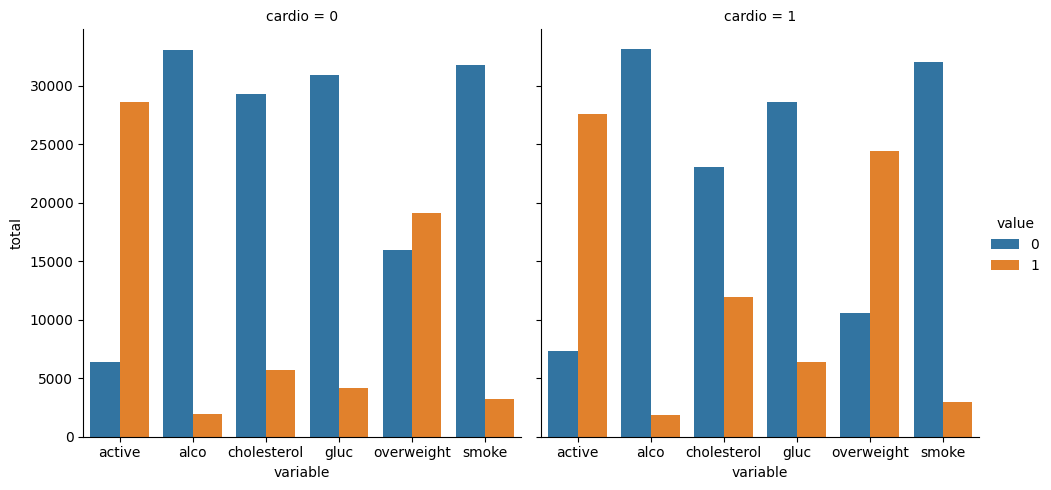

In [19]:
ax = sns.catplot(data=df_cat, x="variable", y="total", hue="value", kind="bar", col="cardio")

In [20]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,old_chol,old_gluc,smoke,alco,active,cardio,BMI,overweight,cholesterol,gluc
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,False,False,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,True,True,False
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,False,True,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,True,False,False
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,False,False,False


In [21]:
df = df.drop(columns=['old_chol','old_gluc','BMI'])

In [22]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,overweight,cholesterol,gluc
0,0,18393,2,168,62.0,110,80,0,0,1,0,False,False,False
1,1,20228,1,156,85.0,140,90,0,0,1,1,True,True,False
2,2,18857,1,165,64.0,130,70,0,0,0,1,False,True,False
3,3,17623,2,169,82.0,150,100,0,0,1,1,True,False,False
4,4,17474,1,156,56.0,100,60,0,0,0,0,False,False,False


In [23]:
new_cols = ['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'overweight']

In [24]:
df = df.reindex(new_cols, axis='columns')

In [25]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,False,False,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,True,False,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,True,False,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,False,False,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,False,False,0,0,0,0,False


In [26]:
(df['ap_lo'] <= df['ap_hi']).value_counts()

True     68766
False     1234
Name: count, dtype: int64

In [27]:
(df['height'] >= df['height'].quantile(0.025)).value_counts()

height
True     68463
False     1537
Name: count, dtype: int64

In [28]:
(df['height'] <= df['height'].quantile(0.975)).value_counts()

height
True     68561
False     1439
Name: count, dtype: int64

In [29]:
(df['weight'] >= df['weight'].quantile(0.025)).value_counts()

weight
True     68510
False     1490
Name: count, dtype: int64

In [30]:
(df['weight'] <= df['weight'].quantile(0.975)).value_counts()

weight
True     68387
False     1613
Name: count, dtype: int64

In [31]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

In [32]:
df_heat.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,False,False,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,True,False,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,True,False,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,False,False,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,False,False,0,0,0,0,False


In [33]:
corr = round(df_heat.corr(), 1 )
#corr = df_heat.corr()

In [34]:
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.2,0.1,0.1,-0.0,-0.0,-0.0,0.2,0.1
sex,0.0,-0.0,1.0,0.5,0.1,0.0,0.1,-0.0,-0.0,0.3,0.2,0.0,0.0,-0.1
height,0.0,-0.1,0.5,1.0,0.3,0.0,0.0,-0.1,-0.0,0.2,0.1,-0.0,-0.0,-0.1
weight,0.0,0.1,0.1,0.3,1.0,0.0,0.2,0.1,0.1,0.1,0.1,-0.0,0.2,0.7
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,0.0,0.2,0.1,0.0,0.2,0.1,1.0,0.2,0.1,0.0,0.0,0.0,0.3,0.2
cholesterol,0.0,0.1,-0.0,-0.1,0.1,0.0,0.2,1.0,0.4,0.0,0.0,0.0,0.2,0.1
gluc,0.0,0.1,-0.0,-0.0,0.1,0.0,0.1,0.4,1.0,-0.0,0.0,-0.0,0.1,0.1
smoke,-0.0,-0.0,0.3,0.2,0.1,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,-0.0,-0.0


In [35]:
mask = np.triu(np.ones_like(corr)).astype(bool)

In [36]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

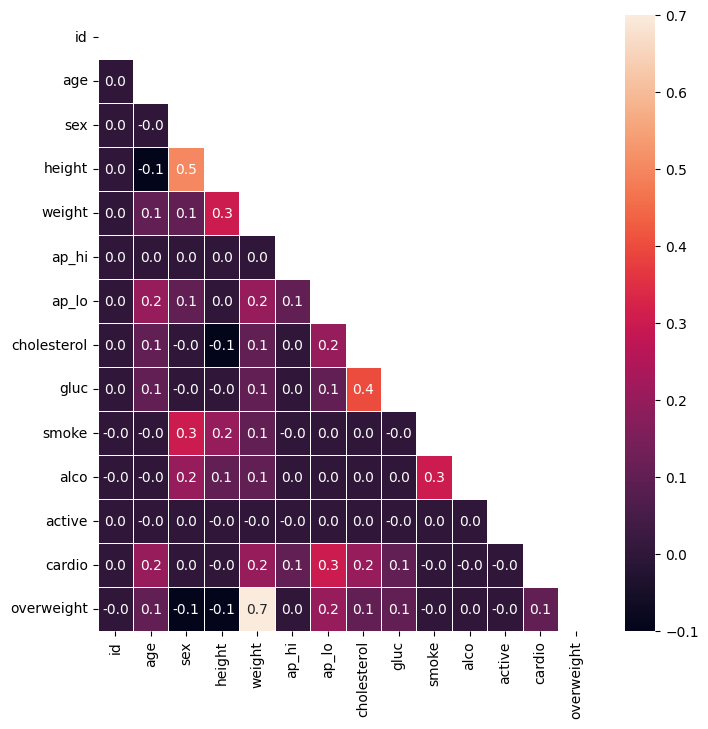

In [37]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))
ax = sns.heatmap(corr, annot=True, fmt=".1f", linewidth=.5, mask=mask)

<Axes: >

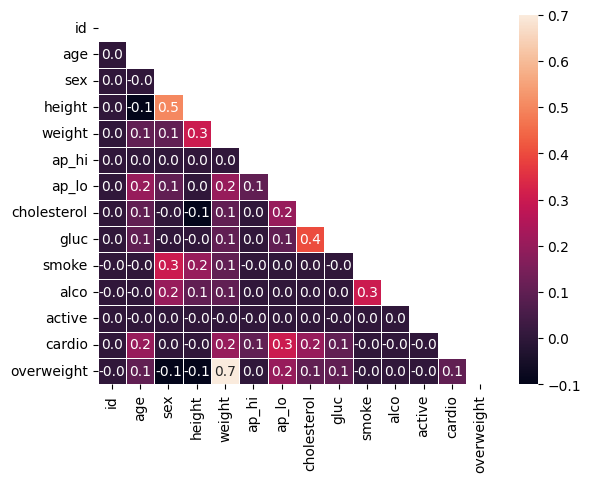

In [38]:
sns.heatmap(corr, annot=True, fmt=".1f", linewidth=.5, mask=mask)